<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/vgg19_fruits02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [86]:
test_path = '/content/fruits_v2/test'
train_path = '/content/fruits_v2/train'
val_path = '/content/fruits_v2/val'

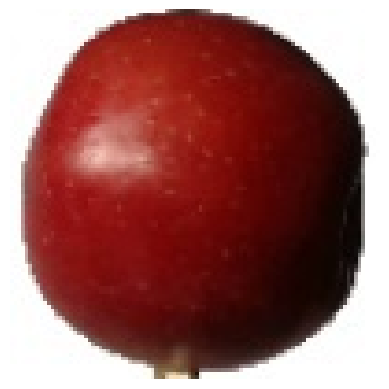

In [87]:
img = load_img(train_path + "/Apple Braeburn/Apple Braeburn_0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [88]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [89]:
numberOfClass = len(glob(train_path + "/*"))
numberOfClass

33

In [90]:
vgg = VGG16()

In [ ]:
print(vgg.summary())

In [92]:
print(type(vgg))

<class 'keras.src.engine.functional.Functional'>


In [93]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.src.engine.input_layer.InputLayer object at 0x7e41b30251e0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e41c318d060>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418d183ee0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e418cfb51e0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418cfb5900>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418cfb5c60>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e418cfb7100>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418cfb7970>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418cfb6860>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e41b330a3e0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7e418d1804f0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418d183d90>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7e418d182da0>, <keras.src.layers.convolutional.co

In [94]:
len(vgg_layer_list)

23

In [95]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [ ]:
print(model.summary())

In [ ]:
for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass, activation = "softmax"))

print(model.summary())

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [98]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), class_mode='categorical')
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), class_mode='categorical')
batch_size = 32


Found 11787 images belonging to 33 classes.
Found 1706 images belonging to 33 classes.


In [ ]:
hist = model.fit_generator(train_data,
                          steps_per_epoch = 1600 // batch_size,
                          epochs = 25,
                          validation_data = test_data,
                          validation_steps = 800 // batch_size)

Epoch 1/25


<ipython-input-99-95a565917a5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


38/50 [=====================>........] - ETA: 3:57 - loss: 1.7189 - accuracy: 0.6933

In [ ]:
model.save_weights("model_fruits_v2.h5")

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()

In [ ]:
import json, codecs

with open("model_model_fruits_v2.json","w") as f:
    json.dump(hist.history,f)

In [ ]:
with codecs.open("model_model_fruits_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

In [ ]:
with codecs.open("model_model_fruits_v2.json","r",encoding= "utf-8") as f:
    n = json.loads(f.read())

In [ ]:
print(hist.history.keys())
plt.plot(n["loss"], label = "training loss")
plt.plot(n["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"], label = "training acc")
plt.plot(n["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()
plt.figure()